In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from __future__ import print_function
import numpy as np
import cv2 as cv
import sys
import getopt
from glob import glob
import os
from matplotlib import pyplot as plt

In [ ]:
def splitfn(fn):
    path, fn = os.path.split(fn)
    name, ext = os.path.splitext(fn)
    return path, name, ext

In [ ]:
PATH = "/content/drive/My Drive/Pictures" #write path of the directory contained images here

dir_list = os.listdir(PATH)

paths =[]

for i in dir_list:

  paths.append(PATH+"/"+i)




['/content/drive/My Drive/Pictures/input.jpg']

Camera matrix:
 [[38.79034217  0.         94.76260702]
 [ 0.         36.29828093 55.12825766]
 [ 0.          0.          1.        ]]
Lens Distortion:
 [[ 0.00521357 -0.00141736  0.00030809 -0.00037497  0.00010551]]


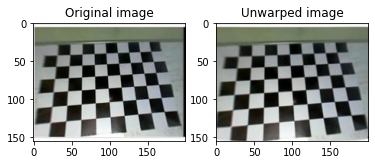

In [ ]:
SIZE = (6, 9)

for i in paths:  
  
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
  
  point3d = []
  
  point2d = []
  
  
  objectp3d = np.zeros((1, SIZE[0]
                        * SIZE[1],
                        3), np.float32)
  objectp3d[0, :, :2] = np.mgrid[0:SIZE[0],
                                0:SIZE[1]].T.reshape(-1, 2)
  prev_img_shape = None
  
  
  image = cv2.imread(i)
  grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  r, c = cv2.findChessboardCorners(
                  grayColor, SIZE,
                  cv2.CALIB_CB_ADAPTIVE_THRESH
                  + cv2.CALIB_CB_FAST_CHECK +
                  cv2.CALIB_CB_NORMALIZE_IMAGE)

  if r != False:
      point3d.append(objectp3d)

      point2d.append(cv2.cornerSubPix(grayColor, c, (11, 11), (-1, -1), criteria))

      image = cv2.drawChessboardCorners(image,
                                        SIZE,
                                        cv2.cornerSubPix(grayColor, c, (11, 11), (-1, -1), criteria), r)

  cv2.waitKey(0)
  
  cv2.destroyAllWindows()
  
  h, w = image.shape[:2]
  
  


  r, K, d, r_vecs, t_vecs = cv2.calibrateCamera(point3d, point2d, grayColor.shape[::-1], None, None)

  print("Camera matrix:\n",K)

  
  print("Lens Distortion:\n",d)


  img = cv2.imread(i)
  h, w = img.shape[:2]


  newcameramatrix, roi = cv2.getOptimalNewCameraMatrix(K, d, (w,h), 0)



  mapx, mapy = cv2.initUndistortRectifyMap(K, d, None, newcameramatrix, (w, h), 5)

  newimg = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)


  fig, (oldimg_ax, newimg_ax) = plt.subplots(1, 2)
  oldimg_ax.imshow(img)
  oldimg_ax.set_title('Original image')
  newimg_ax.imshow(newimg)
  newimg_ax.set_title('Unwarped image')
  plt.show()


